## Supervised Machine Learning with Train_test_split()

In [121]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
x = np.arange(20).reshape(-1,1)
y = np.array([5,12,11,19,30,29,23,40,51,54,74,62,68,73,89,84,89,99,101,106])

In [66]:
y.shape

(20,)

### Splitting the data

In [68]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.40,random_state=0)

In [69]:
x_train

array([[ 4],
       [ 2],
       [ 5],
       [14],
       [ 9],
       [ 7],
       [16],
       [11],
       [ 3],
       [ 0],
       [15],
       [12]])

### Building the Linear Regression Model

In [70]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [116]:
#Finding Slope and intersection of the equation y = mx + c
print(model.intercept_)
print(model.coef_)



3.1617195496417523
[5.53121801]


In [73]:
# Checking the score() for the training data
# score() returns the coefficient of determination or Rsquare for the data passed 
model.score(x_train,y_train)*100

98.68175024574795

In [74]:
# Checking the score() for the test data
model.score(x_test,y_test)

0.9490474998458416

In [102]:
model_prediction = model.predict(x)
y_predictions = pd.DataFrame(model_prediction, columns = ['y_pred'] )

/Users/shyamgoyal/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [108]:
# Convert array into DataFrame 
x = pd.DataFrame(x, columns =['X'])
y = pd.DataFrame(y, columns =['Y'])
y_predictions = pd.DataFrame(model_prediction, columns = ['Y_pred'] )

In [109]:
frame = [x,y]
df=pd.concat(frame, axis=1)

In [110]:
frames = [df,y_predictions]
y_frame=pd.concat(frames, axis=1)

In [111]:
y_frame

,X,Y,Y_pred
0,0,5,3.161720
1,1,12,8.692938
2,2,11,14.224156
3,3,19,19.755374
4,4,30,25.286592
5,5,29,30.817810
6,6,23,36.349028
7,7,40,41.880246
8,8,51,47.411464
9,9,54,52.942682


### Calculating the Room Mean Square ErroR

In [114]:
# Mean Absolute Error
MAE = metrics.mean_absolute_error(y_frame.Y,y_frame.Y_pred)
MAE

3.7822415557830125

In [115]:
# Root Mean Square Error
RMSE = np.sqrt(MAE)
RMSE

1.9447985900300866

### Plotting the prediction VS Original y value

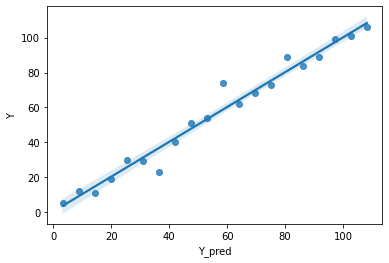

In [122]:
sns.regplot(x='Y_pred', y = 'Y', data = y_frame)
plt.show()